# Exploring Hotel Booking Patterns: From Data to Insights

>📊 Exploratory Data Analysis (EDA) | 🏨 Booking Trends |  🔍 Cancellation Insights | 📈 Predictive Modelin

_______________

 >Introduction:

In the hospitality industry, hotels rely heavily on the ability to predict booking behavior to ensure operational efficiency and maximize revenue.  
By analyzing historical data, we can identify patterns that help hotels improve marketing strategies, manage occupancy, and reduce unexpected cancellations.

In this project, we will explore hotel booking data to address potential issues and implement `Logistic Regression` and `XGBoost`# models to analyze and predict booking behavior accurately, ultimately enhancing decision-making processes.


_________________

>🎯 Project Objectives
- Understand hotel booking behavior and predict cancellations.  
- Improve marketing strategies and occupancy management to optimize operations.  
- Utilize predictive models to extract valuable insights that assist hotels in enhancing their services.  


____________

>🗂️ Data Description

The dataset contains detailed booking information, including arrival dates, guest counts, and payment methods.  

We will analyze the relationships between variables to understand the factors influencing cancellation decisions and develop proactive strategies.


_____________________

Import Libraries

In [235]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [236]:
import warnings
warnings.filterwarnings(action="ignore")

Upload data ⬆⬆⬆

In [237]:
df = pd.read_csv("hotel_bookings - hotel_bookings.csv")
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


__________

> 🔍 Data Cleaning & Preprocessing

Before building a strong model, we must first ensure that our data is `clean and well-organized`.

Steps:
1. Handle missing values ⭕  
2. Remove unnecessary duplicates 🔄  
3. Encode categorical variables 🎭  
4. Feature selection for predictive modeling ✨  

_________

Read and Explore Data 🔎🔎

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [239]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [240]:
df.shape

(119390, 32)

In [241]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [242]:
df.duplicated().sum()

31994

In [243]:
df.drop_duplicates(inplace=True)

In [244]:
df.duplicated().sum()

0

In [245]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


Visualizing Missing Data 📊

In [246]:
df.isnull().sum().sum()

94786

<Axes: >

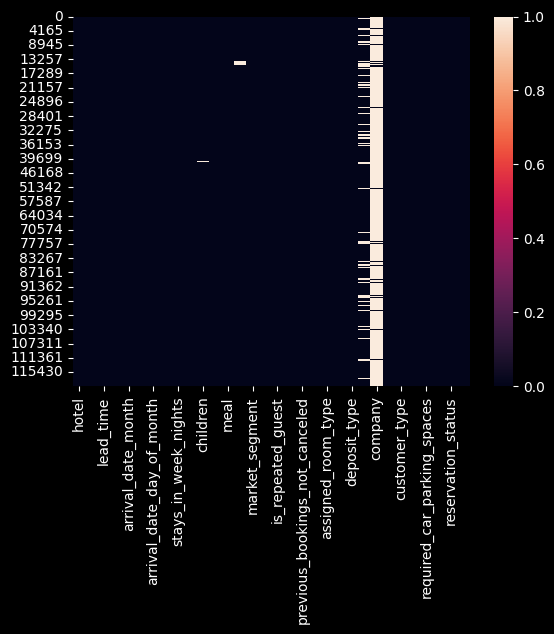

In [247]:
sns.heatmap(df.isnull())

In [248]:
missing_table = df.isnull().mean().mul(100).loc[lambda x: x > 0].sort_values()
missing_table

children     0.004577
country      0.517186
agent       13.951439
company     93.982562
dtype: float64

In [249]:
missing_table = pd.DataFrame({
    "Missing Values": df.isnull().sum(),
    "Percentage ": df.isnull().mean().mul(100)
}).loc[lambda x: x["Missing Values"] > 0].sort_values("Percentage ")
missing_table

,Missing Values,Percentage
children,4,0.004577
country,452,0.517186
agent,12193,13.951439
company,82137,93.982562


In [250]:
colors = ["#512d6d", "#5f3a7a", "#6c4887", "#7a5694", "#8763a1", "#9471ad", "#a27fba", "#b08dc7", "#bea1d4"]

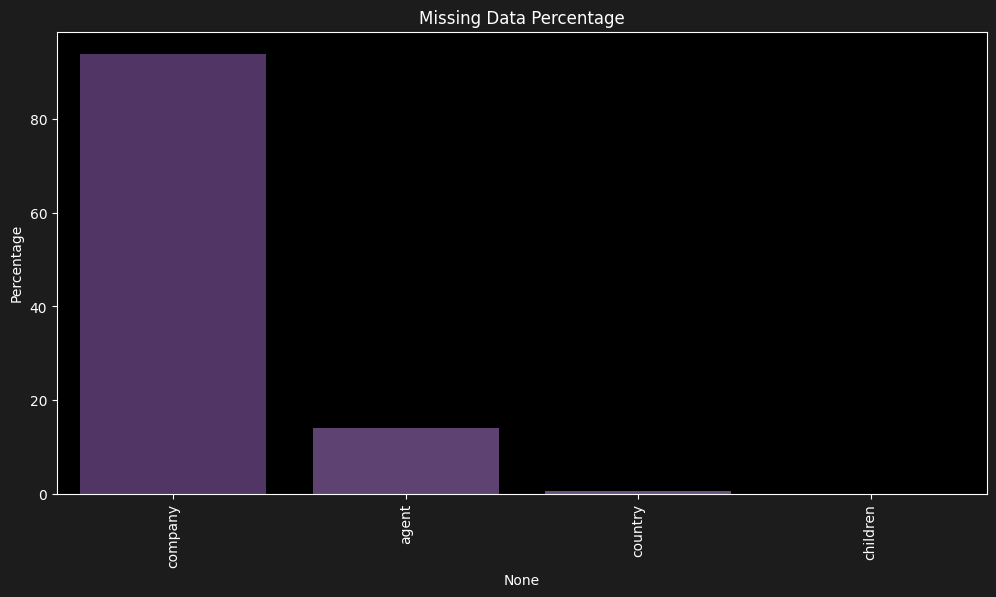

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")
plt.figure(figsize=(12,6), facecolor="#1C1C1C")
sns.barplot(x=missing_table.index[::-1], y=missing_table["Percentage "][::-1], palette=colors)
plt.xticks(rotation=90, color="white"); plt.yticks(color="white")
plt.title("Missing Data Percentage", color="white"); plt.ylabel("Percentage", color="white")
plt.show()

In [252]:
df.isnull().sum().sum()

94786

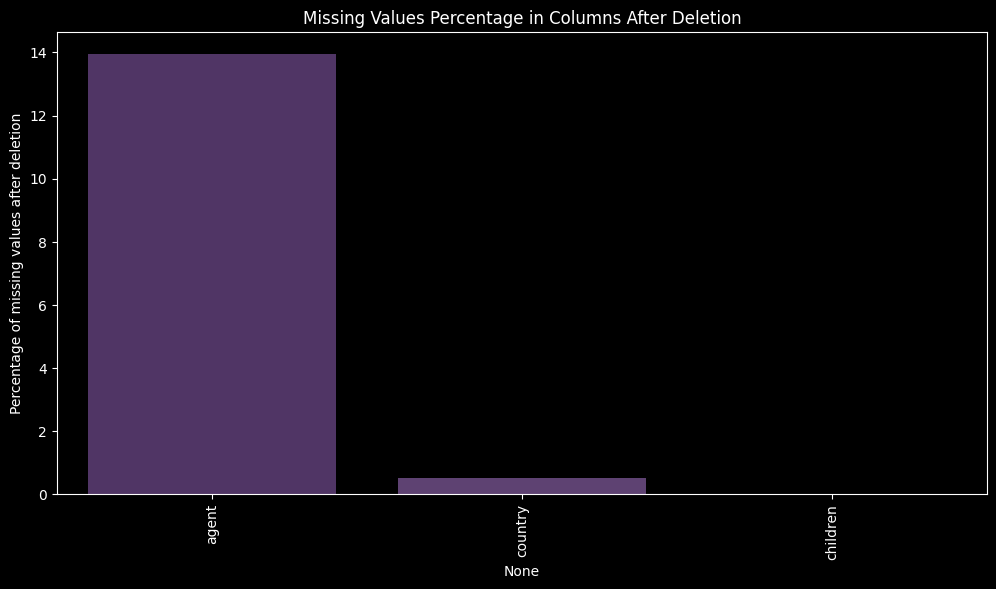

In [253]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)  
df_cleaned = df.dropna(axis=1, thresh=threshold)

# Cheak the missing values
missing_values_after = df_cleaned.isnull().sum() / len(df_cleaned) * 100
missing_values_after = missing_values_after[missing_values_after > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))                     # Graphic 
sns.barplot(x=missing_values_after.index, y=missing_values_after, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("Percentage of missing values after deletion")
plt.title("Missing Values Percentage in Columns After Deletion")
plt.show()

In [254]:
df_cleaned.isnull().sum().sum()

12649

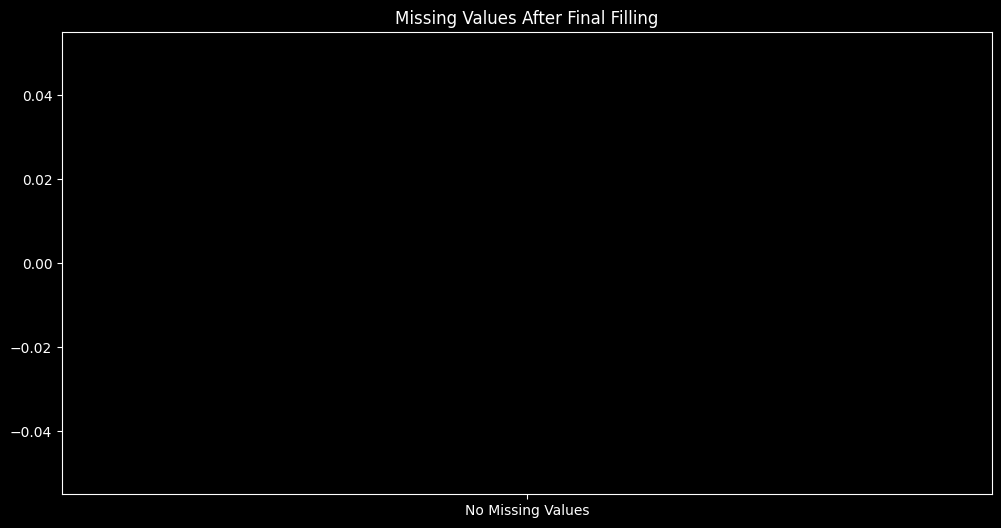

In [255]:
12649
df.fillna(df.mode().iloc[0], inplace=True)   # Fill missing values in categorical columns with the most frequent value (mode)

# Cheak the missing values
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12,6))     # Graphic 
if missing_percent.empty:
    sns.barplot(x=["No Missing Values"], y=[0], palette="viridis")
else:
    sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="viridis")

plt.xticks(rotation=0)
plt.title("Missing Values After Final Filling")
plt.show()

In [256]:
df.isnull().sum().sum()

0

Missing Values is Over ✨✨

_________________

>📊 Feature Distribution Visualization

To better understand the distribution of key categorical features,  
we will visualize them using **FacetGrid** with `seaborn`.

This helps us identify:
- Imbalances in booking sources  
- Seasonal booking trends  
- Customer and deposit types  
- Reservation statuses  


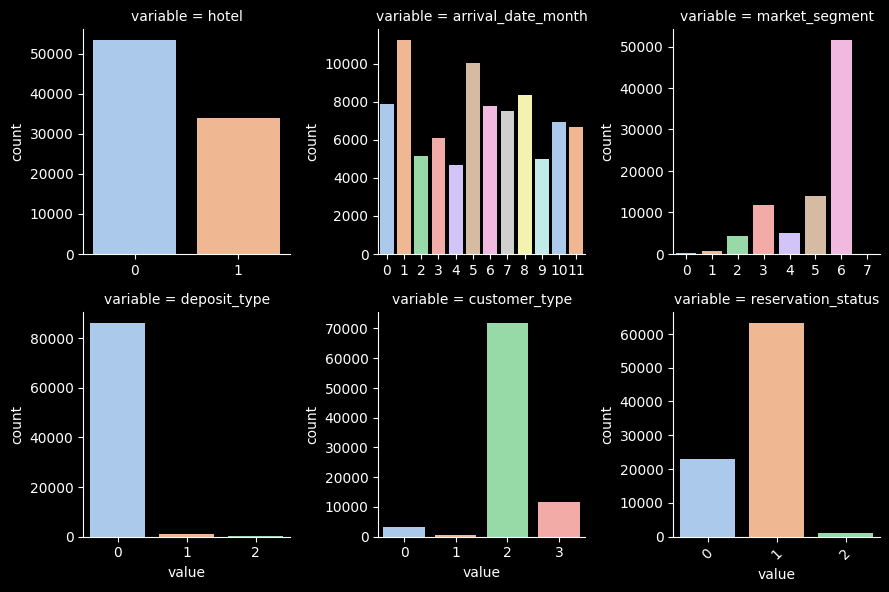

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['hotel','arrival_date_month','market_segment','deposit_type','customer_type','reservation_status']
df_melted = df.melt(value_vars=selected_features)
g = sns.FacetGrid(df_melted, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.countplot, "value", palette="pastel")
plt.xticks(rotation=45)
plt.show()

_______________

Encoding 👈👈

In [258]:
# Encode categorical data
label_encoders = {}    
for col in [    "hotel",  "deposit_type", "customer_type", "reservation_status", "arrival_date_month","meal","country","market_segment",
            "distribution_channel","reserved_room_type", "assigned_room_type", "reservation_status_date"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,9.0,40.0,0,2,0.00,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,0,9.0,40.0,0,2,0.00,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,9.0,40.0,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,304.0,40.0,0,2,75.00,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,240.0,40.0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,394.0,40.0,0,2,96.14,0,0,1,919
119386,0,0,102,2017,1,35,31,2,5,3,...,0,9.0,40.0,0,2,225.43,0,2,1,920
119387,0,0,34,2017,1,35,31,2,5,2,...,0,9.0,40.0,0,2,157.71,0,4,1,920
119388,0,0,109,2017,1,35,31,2,5,2,...,0,89.0,40.0,0,2,104.40,0,0,1,920


The data is ready for use ✔✔✔

_______________________

Splitting Data

In [259]:
X = df.drop("is_canceled", axis=1)  # 

y = df["is_canceled"]  # الهدف

X


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,9.0,40.0,0,2,0.00,0,0,1,121
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,9.0,40.0,0,2,0.00,0,0,1,121
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,9.0,40.0,0,2,75.00,0,0,1,122
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,304.0,40.0,0,2,75.00,0,0,1,122
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,240.0,40.0,0,2,98.00,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,1,35,30,2,5,2,0.0,...,0,394.0,40.0,0,2,96.14,0,0,1,919
119386,0,102,2017,1,35,31,2,5,3,0.0,...,0,9.0,40.0,0,2,225.43,0,2,1,920
119387,0,34,2017,1,35,31,2,5,2,0.0,...,0,9.0,40.0,0,2,157.71,0,4,1,920
119388,0,109,2017,1,35,31,2,5,2,0.0,...,0,89.0,40.0,0,2,104.40,0,0,1,920


In [260]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87396, dtype: int64

In [261]:
#splilt 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

_________________

Logistic Regression Model 😐😐

In [262]:
#training
lr = LogisticRegression()


#training the mode1
lr.fit(X_train, y_train)

LogisticRegression()

In [263]:
#pridect the target
y_pred =lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [264]:
y_test

41000     0
27416     0
30610     0
38792     0
7532      1
         ..
112789    0
15992     0
106644    0
62029     1
21320     0
Name: is_canceled, Length: 17480, dtype: int64

Model Evaluation 🎇🎇

In [265]:
#evaluation 
acc =accuracy_score(y_test,y_pred)
print(f"accuracy: {acc:.2f}")     #✔✔✔✔

accuracy: 0.79


In [266]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     12733
           1       0.69      0.42      0.52      4747

    accuracy                           0.79     17480
   macro avg       0.75      0.67      0.69     17480
weighted avg       0.78      0.79      0.77     17480



______________

XGBoost models ✌✌

In [267]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy XGBoost: {accuracy:.2f}")

accuracy XGBoost: 1.00


In [268]:
from sklearn.model_selection import cross_val_score

# (Cross-Validation)
scores = cross_val_score(model, X, y, cv=5)  #
print(f"Average model accuracy through cross-validation: {scores.mean():.2f}")

print(classification_report(y_test,y_pred))

Average model accuracy through cross-validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12733
           1       1.00      1.00      1.00      4747

    accuracy                           1.00     17480
   macro avg       1.00      1.00      1.00     17480
weighted avg       1.00      1.00      1.00     17480



____________

>Conclusion 💯🎉

After an insightful analytical journey, we have gained a deeper understanding of hotel booking behavior and the factors influencing 

cancellations. Through data analysis techniques and the application of predictive models such as Logistic Regression and XGBoost, we have 

extracted valuable insights that contribute to smarter decision-making in the hospitality industry.

✅ Key Findings:

- Predicting booking behavior can significantly enhance hotel operational efficiency.

- Features such as lead time and payment method play a crucial role in determining cancellation probability.

- The XGBoost model performed better in handling imbalanced data.

🚀 Next Steps:

The model can be improved by incorporating additional features like price trends and promotional data, as well as applying deep learning 

techniques for greater accuracy. As AI continues to evolve, hotels can refine their strategies and proactively adjust decisions to ensure a 

seamless guest experience.
________________________________

**✨ Ultimately, data is not just numbers—it is the key to understanding the world and making smarter choices.**



____

**✨ In the end, we extend our gratitude to everyone who followed and learned with us throughout this journey. Knowledge is the key, and**

**perseverance in learning and experimentation will lead to success! Keep exploring the world of data—every analysis has a story worth telling. 😊**

